In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
flight_delay_origin = pd.read_csv("data/clean/LAX_Origin_Flight_Delays_2016.csv")

In [3]:
flight_delay_origin.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'Carrier', 'TailNum', 'FlightNum', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateName', 'OriginWac', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'DestWac', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'CarrierName'],
      dtype='object')

In [4]:
city_dest = flight_delay_origin['DestCityName'].value_counts()
city_dest = city_dest.reset_index().sort_values(['index'])
city_dest = city_dest.rename(columns={"index":"Destination City Name" , "DestCityName":"Number of Flights"})
city_dest.head()

,Destination City Name,Number of Flights
44,"Albuquerque, NM",1202
55,"Anchorage, AK",526
51,"Aspen, CO",691
8,"Atlanta, GA",6468
24,"Austin, TX",2891


In [5]:
dest_flight_delays = flight_delay_origin['DepDel15'].value_counts()
dest_flight_delays

0.0    162654
1.0     48494
Name: DepDel15, dtype: int64

In [6]:
grouped_delays = flight_delay_origin.groupby(['DestCityName']).sum()
grouped_delays

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightNum,OriginWac,DestWac,CRSDepTime,DepTime,...,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
DestCityName,,,,,,,,,,,,,,,,,,,,,
"Albuquerque, NM",2423232,3000,7764,19140,4741,3769761,109382,103372,1714835,1722143.0,...,127699.0,104390.0,1202.0,813754.0,3606,4072.0,0.0,2133.0,152.0,12714.0
"Anchorage, AK",1060416,1344,3519,8306,2151,129064,47866,526,1059923,931415.0,...,170254.0,156008.0,526.0,1233470.0,5260,767.0,0.0,1609.0,0.0,963.0
"Aspen, CO",1393056,1517,3943,11348,2901,3665764,62881,56662,758466,770694.0,...,83519.0,66249.0,691.0,509267.0,2073,4123.0,666.0,1857.0,65.0,3486.0
"Atlanta, GA",13039488,16247,42233,101725,25686,9301791,588588,219912,8037241,7965387.0,...,1619617.0,1449890.0,6468.0,12588807.0,51744,27831.0,586.0,14492.0,354.0,25316.0
"Austin, TX",5828256,7287,18988,45681,11343,7786972,263081,213934,3831792,3876822.0,...,502091.0,433695.0,2891.0,3590622.0,14455,11156.0,460.0,3172.0,100.0,15179.0
"Baltimore, MD",3911040,5139,13479,30478,7634,2232995,176540,67900,2932863,2774788.0,...,563780.0,520234.0,1940.0,4518260.0,19400,5078.0,200.0,6141.0,316.0,5810.0
"Bend/Redmond, OR",425376,694,1897,3356,848,640680,19201,19412,202415,204869.0,...,26315.0,20640.0,211.0,153186.0,633,619.0,0.0,535.0,0.0,1005.0
"Boise, ID",1229760,1726,4614,9849,2473,3155028,55510,50630,1133204,1142895.0,...,74498.0,59014.0,610.0,411140.0,1830,3262.0,131.0,1167.0,28.0,7075.0
"Boston, MA",9299808,11792,30753,72889,18352,3587561,419783,59969,6612821,6367467.0,...,1493551.0,1376829.0,4613.0,12044543.0,50743,14871.0,1067.0,12875.0,845.0,14887.0


In [7]:
delays = grouped_delays['DepDel15']
delays = delays.reset_index()
delays = delays.rename(columns={"DestCityName": "Destination City Name"})

In [8]:
merged_df = city_dest.merge(delays, on="Destination City Name")
merged_df.head()

,Destination City Name,Number of Flights,DepDel15
0,"Albuquerque, NM",1202,348.0
1,"Anchorage, AK",526,70.0
2,"Aspen, CO",691,169.0
3,"Atlanta, GA",6468,1577.0
4,"Austin, TX",2891,542.0


In [9]:
merged_df["Flight Delay Percentage"] = (merged_df["DepDel15"]/merged_df["Number of Flights"])*100
Flight_Delay_Percentage = merged_df[["Destination City Name", "Number of Flights", "DepDel15", "Flight Delay Percentage"]]
Flight_Delay_Percentage

,Destination City Name,Number of Flights,DepDel15,Flight Delay Percentage
0,"Albuquerque, NM",1202,348.0,28.951747
1,"Anchorage, AK",526,70.0,13.307985
2,"Aspen, CO",691,169.0,24.457308
3,"Atlanta, GA",6468,1577.0,24.381571
4,"Austin, TX",2891,542.0,18.747838
5,"Baltimore, MD",1940,462.0,23.814433
6,"Bend/Redmond, OR",211,34.0,16.113744
7,"Boise, ID",610,164.0,26.885246
8,"Boston, MA",4613,842.0,18.252764
9,"Bozeman, MT",164,26.0,15.853659


In [10]:
Sorted_FDP = Flight_Delay_Percentage[Flight_Delay_Percentage["Number of Flights"] >= 200]
Sorted_FDP = Sorted_FDP.reset_index(drop = True)
Sorted_FDP

,Destination City Name,Number of Flights,DepDel15,Flight Delay Percentage
0,"Albuquerque, NM",1202,348.0,28.951747
1,"Anchorage, AK",526,70.0,13.307985
2,"Aspen, CO",691,169.0,24.457308
3,"Atlanta, GA",6468,1577.0,24.381571
4,"Austin, TX",2891,542.0,18.747838
5,"Baltimore, MD",1940,462.0,23.814433
6,"Bend/Redmond, OR",211,34.0,16.113744
7,"Boise, ID",610,164.0,26.885246
8,"Boston, MA",4613,842.0,18.252764
9,"Charlotte, NC",2117,373.0,17.619273


In [11]:
High_Average = Sorted_FDP[Sorted_FDP["Flight Delay Percentage"] >= 30]
High_Average= High_Average.reset_index(drop = True)
High_Average

,Destination City Name,Number of Flights,DepDel15,Flight Delay Percentage
0,"Cincinnati, OH",713,224.0,31.416550
1,"El Paso, TX",928,322.0,34.698276
2,"Fort Lauderdale, FL",1912,649.0,33.943515
3,"Kansas City, MO",1594,513.0,32.183187
4,"Milwaukee, WI",412,127.0,30.825243
5,"Pittsburgh, PA",426,147.0,34.507042
6,"San Antonio, TX",1373,415.0,30.225783
7,"St. Louis, MO",1760,579.0,32.897727


/Users/nicholasroach/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nicholasroach/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


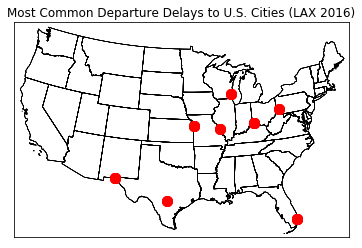

In [11]:
 #Draw the locations of cities on a map of the US

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math

cities = [["Cincinnati",5],
          ["El Paso",5],
          ["Fort Lauderdale",5],
          ["Kansas City",5],
          ["Milwaukee", 5],
          ["Pittsburgh", 5],
          ["San Antonio", 5],
          ["St. Louis", 5]]
scale = 5

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)


# Get the location of each city and plot it
geolocator = Nominatim()
for (city,count) in cities:
    loc = geolocator.geocode(city)
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)

plt.title('Most Common Departure Delays to U.S. Cities (LAX 2016)')
plt.savefig('Common_Departure_Delay_Cities.png')
plt.show()